<h1 style="margin-bottom:0"><center>DI 501 - Introduction to Data Informatics</center></h1>
<h2 style="margin-top:0"><center>Assignment #4</center></h2>
<h3 style="margin-top:0"><center>Due: December 26, Sunday 23:59</center></h3>
<br>
<p style="margin-top:0"><center><b>This assignment is prepared for DI 501 - Introduction to Data Informatics course offered by  Middle East Technical University.</b></center></p>
<hr style="height:2px;color:navy;margin-top:0">
<p style="margin-top:0; text-align: justify; font-size:15px">The objectives of this assignment are:
    <li>You will be able to use standardization and normalization. </li>
    <li>You will be able to perform PCA.</li>
    <li>You will be able to perform classification algorithms.</li>
    
### Submission and Grading Policy ###
<p style="margin-top:0"><center><b></b></center></p>
  
- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_4.ipynb (e.g., “e123456_HW_4.ipynb”).
- Late submissions will be accepted by December 29, 2021, 23:59 with a 5% per day penalty.
- Do not change variable names in the code blocks and the texts in the markdowns.
- **<font color=#C91414>This is an individual assignment. Please do not collaborate. You have to adhere to the academic integrity principles.</font>** 
- If needed, you are required to explain your reasonings by adding new blocks below your codes.

<h3 style="margin-bottom:0">Import Libraries</h4>

Here, please import pyplot and seaborn libraries of Python. You may also import any other library that you intend to use here.

In [1]:
### answer ###
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

<h3 style="margin-bottom:0">1) Data (5 pts)</h3>

We will be utilizing a dataset that is used for classification. It is called music genre classification dataset. It consist of 16 explanatory variables and 1 target variable (class). In total it has about 18000 rows. 

Please import data with correct delimiter here and retrieve the first 5 rows. Then, you should drop the first two columns (artist name and track name).

In [2]:
### answer ###
df = pd.read_csv('./genre.csv', delimiter=',')
df.head(5)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


<h3 style="margin-bottom:0">2) Classification</h3>

For the following use mushroom data.

    a) Perform five fold cross validation. You are supposed to reserve one fold to a test dataset and the remaining is to a training and validation dataset.
    b) Apply 3 different types of classification algorithms that we have learned and used 2 different types of parameters. Explain how you selected the parameters. You will have 6 classification models. Considering all the folds, you will have a total of 30 models.
    c) Create a table that summarizes accuracy, recall and precision values for each of the 6 classifications. Which algorithm performs the best here? Compare their performances and comment on them.
    
    
    Notes:
    1) Please use standardization, normalization or a combination of them. Explain how you selected it.
    2) Your graphs should be reproducible. It means whenever I run your code, I should be able to get same numbers.
    3) Never use test dataset for model selection.
    4) For a 5-fold cross validation, you will have 5 models belonging to the same type of model with the same parameters (->a cla. Choose the best model configuration which produced the best overall result on the validation dataset. 

### Exploration

`Artist Name` and `Track Name` are text, so we won't use them to train our models.

In [3]:
df.drop(columns=['Artist Name', 'Track Name'], axis=1, inplace=True)
df.head(5)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


The target variable is `Class` and it is a categorical variable with 11 values.

In [4]:
sorted(df['Class'].unique().tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
y_cols = df.columns[-1:].tolist()
x_cols = df.columns[:-1].tolist()
print(f'input variables {x_cols}')
print(f'target variable {y_cols}')

input variables ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']
target variable ['Class']


Let's drop any row without target variable.

In [6]:
df.dropna(how='any', axis=0, subset=y_cols, inplace=True)

Let's check some useful characteristics of the variables with `describe` method of pandas. We'll also check number of unique and missing values for each variable.

In [7]:
def describe(df):
    desc = df.describe()
    desc.loc['n_unique', :] = df.nunique().values
    desc.loc['n_missing', :] = df.isna().sum().values
    return desc

In [8]:
describe(df)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000
n_unique,100.000000,909.000000,1208.000000,11.000000,9002.000000,2.000000,1194.000000,3930.000000,4253.000000,1459.000000,1320.000000,13562.000000,1.412100e+04,4.000000,11.000000
n_missing,428.000000,0.000000,0.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,4377.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000


From the table above, we can assume that `key`, `mode`, and `time_signature` are categorical variables since they have very few unique values compared to the size of the dataset. `Popularity` is a discretized variable.

In [9]:
categs = sorted(['key', 'mode', 'time_signature'])
numericals = sorted(set(df[x_cols].columns).difference(categs))
print(f'Categorical variables: {categs}')
print(f'Numerical variables: {numericals}')

Categorical variables: ['key', 'mode', 'time_signature']
Numerical variables: ['Popularity', 'acousticness', 'danceability', 'duration_in min/ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']


Let's re-arrange column order so that numerical columns come first.

In [10]:
x_cols = numericals + categs
df = df[x_cols + y_cols]
df.head()

,Popularity,acousticness,danceability,duration_in min/ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature,Class
0,60.0,0.017100,0.854,234596.0,0.564,NaN,0.0849,-4.964,0.0485,134.071,0.8990,1.0,1,4,5
1,54.0,0.001100,0.382,251733.0,0.814,0.004010,0.1010,-7.230,0.0406,116.454,0.5690,3.0,1,4,10
2,35.0,0.486000,0.434,109667.0,0.614,0.000196,0.3940,-8.334,0.0525,147.681,0.7870,6.0,1,4,6
3,66.0,0.021200,0.853,173968.0,0.597,NaN,0.1220,-6.528,0.0555,107.033,0.5690,10.0,0,4,5
4,53.0,0.000169,0.167,229960.0,0.975,0.016100,0.1720,-4.279,0.2160,199.060,0.0918,2.0,1,4,10


Let's plot histograms of categorical and numerical variables.

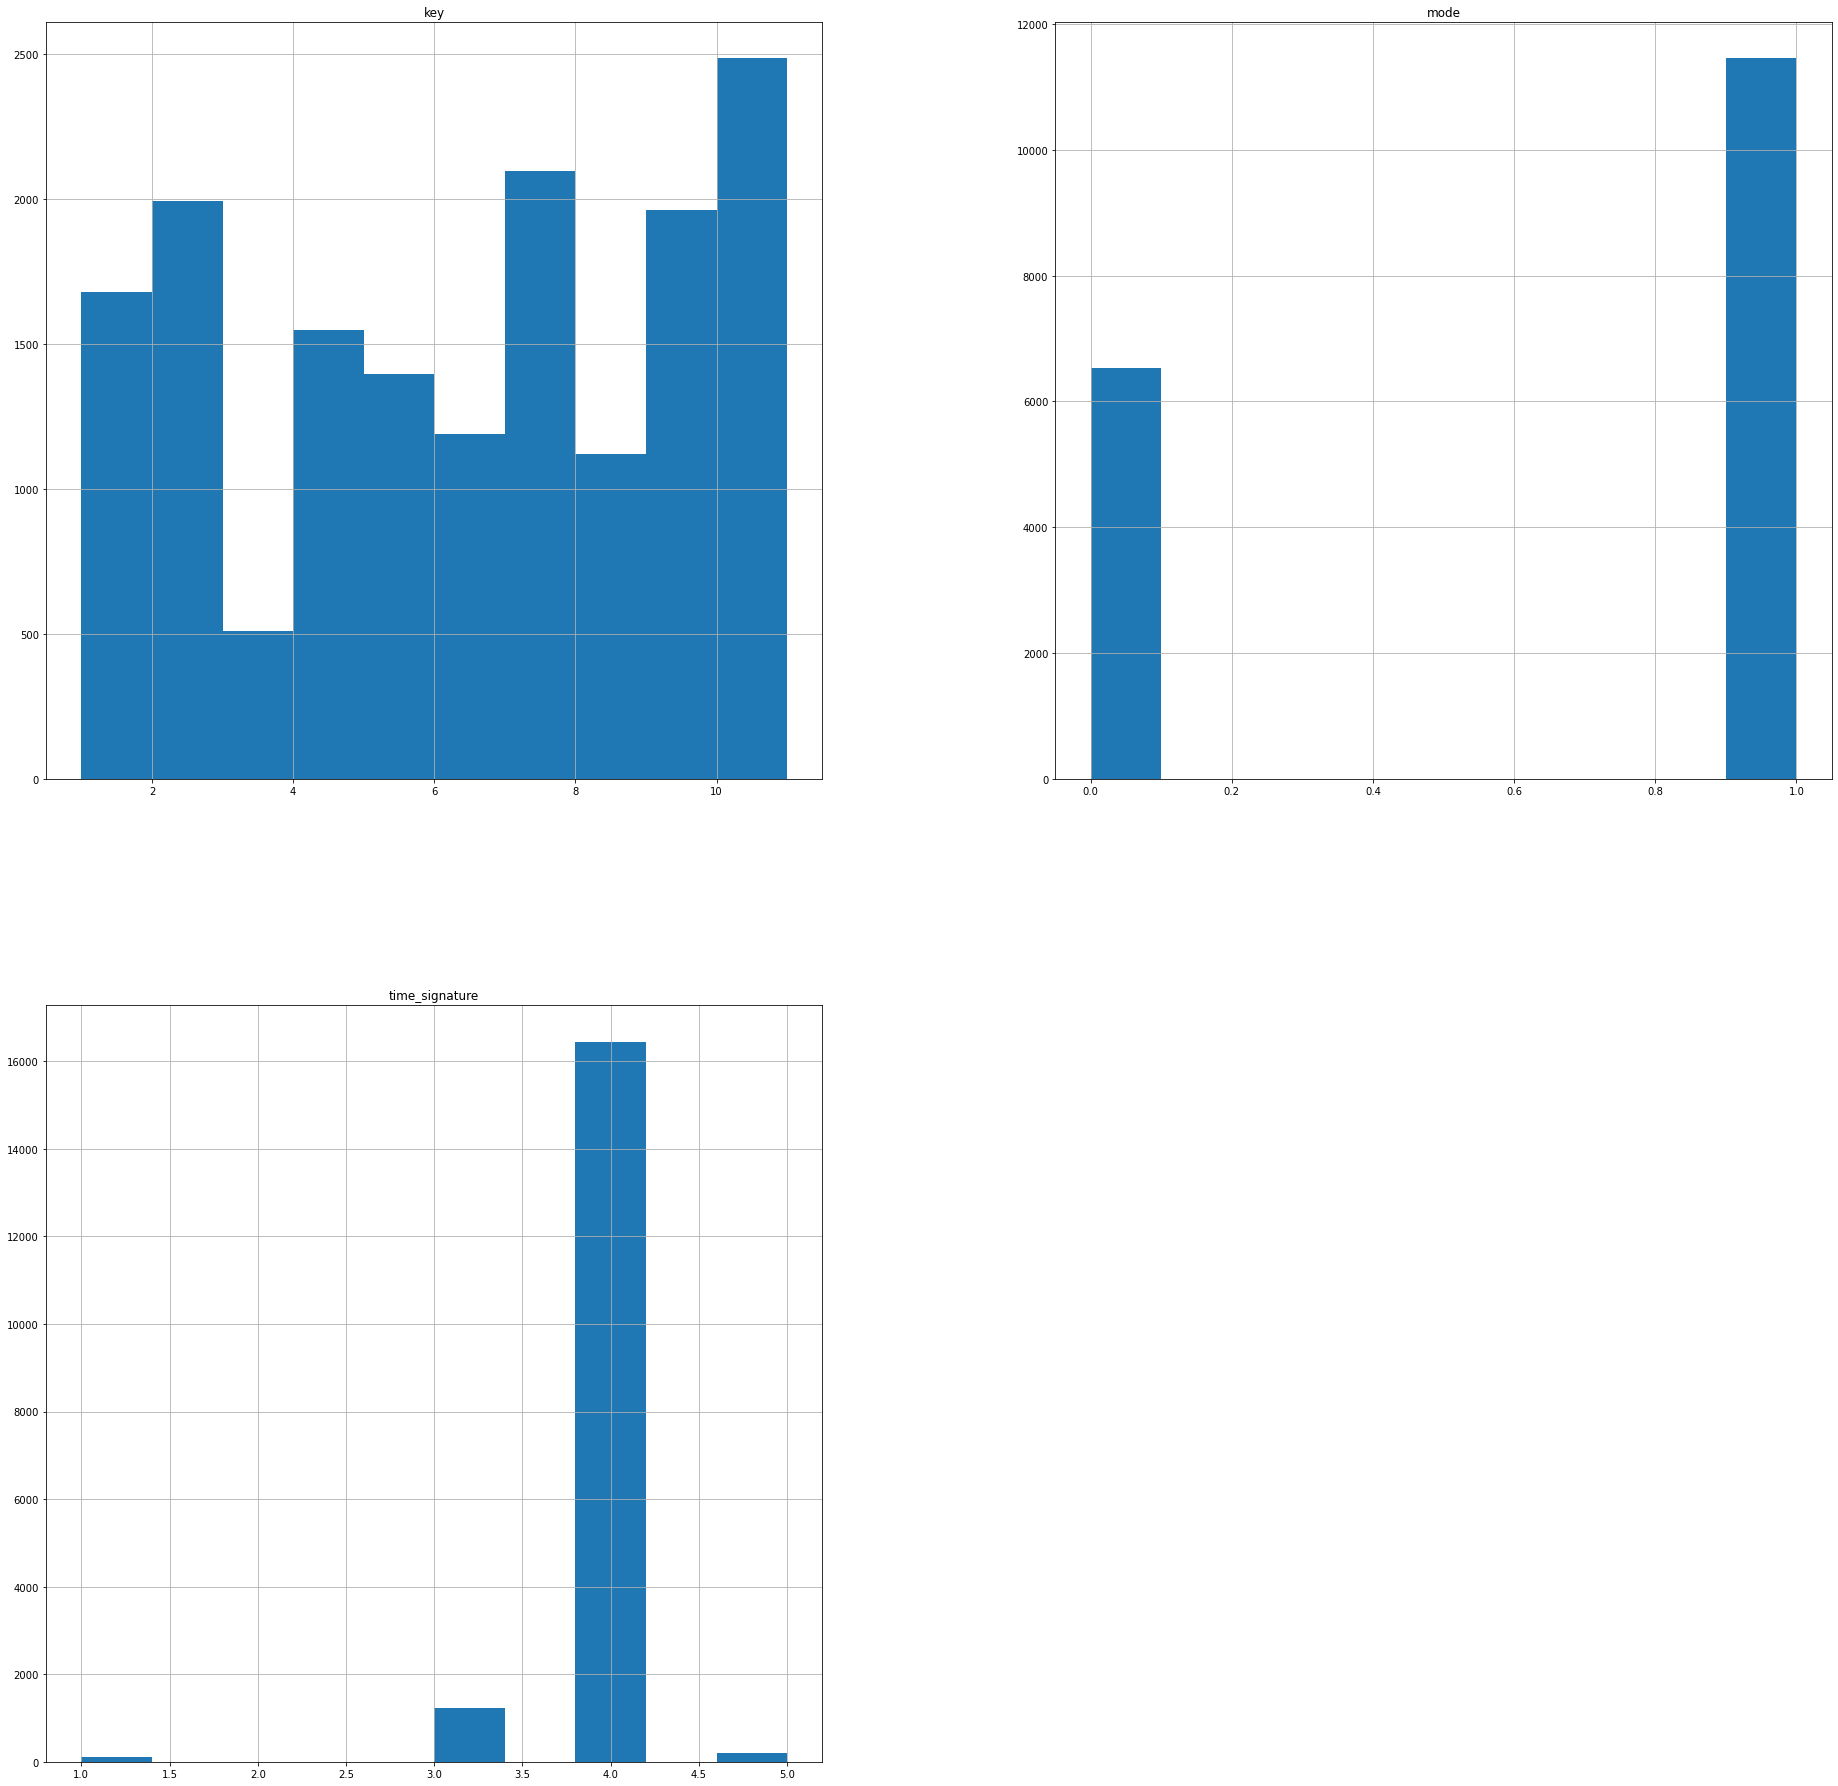

In [11]:
df[categs].hist(figsize=(32, 32));
plt.show();

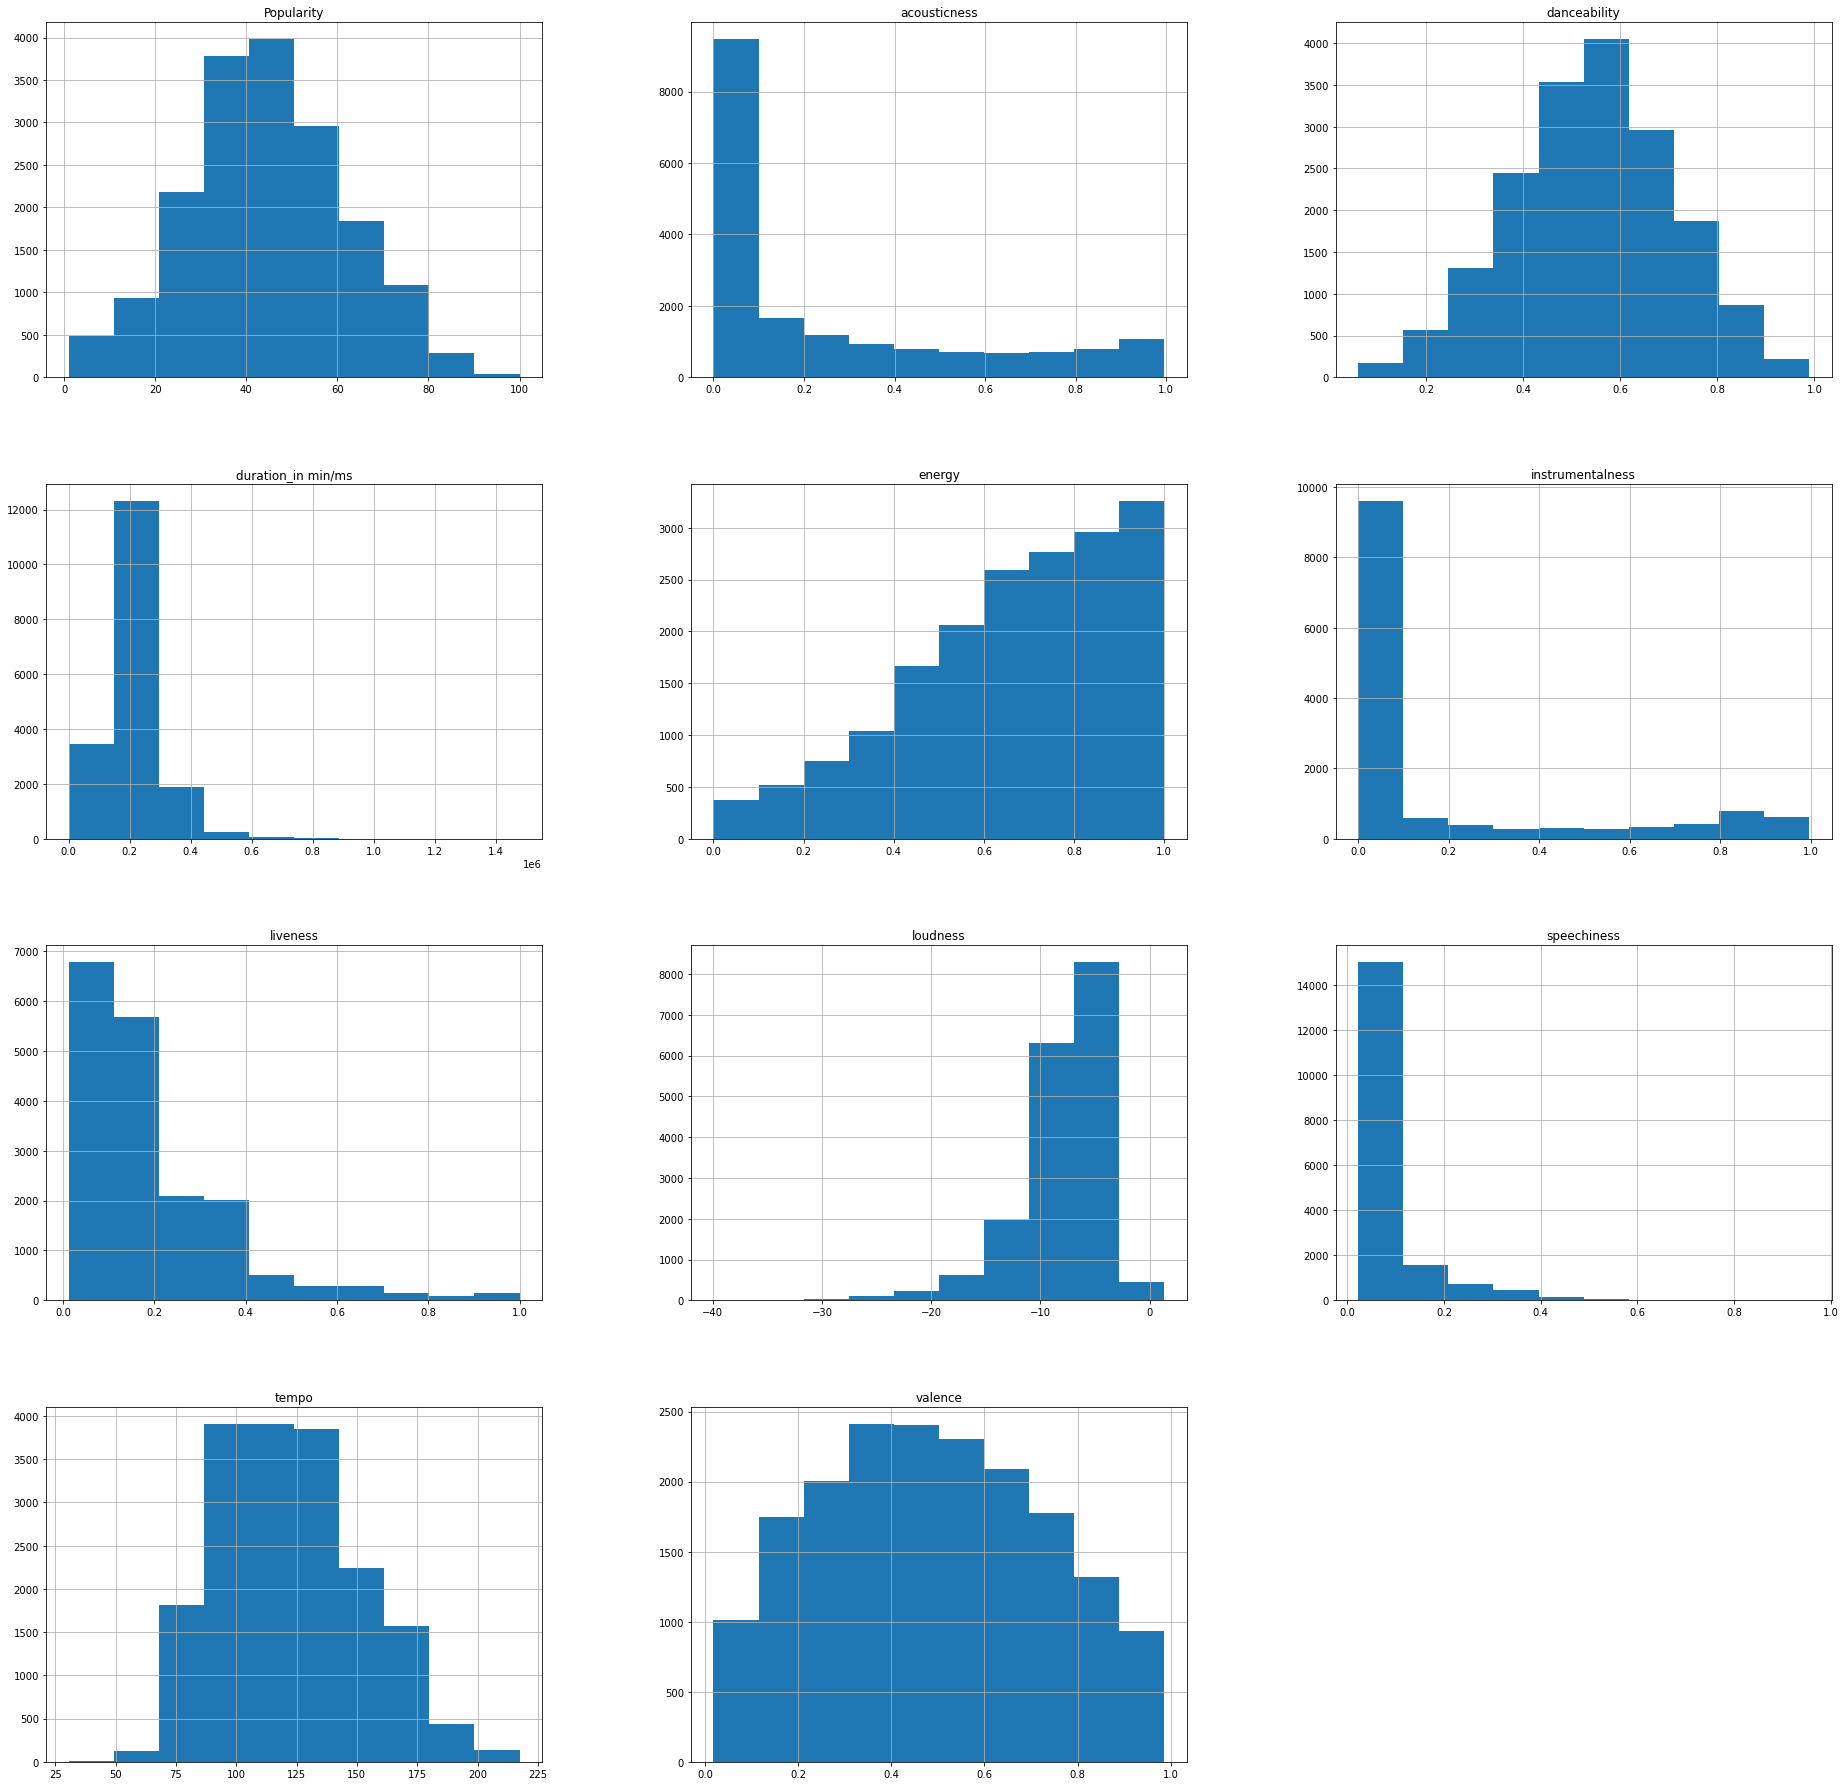

In [12]:
df[numericals].hist(figsize=(32, 32));
plt.show();

`Popularity`, `danceability`, `valence`, and `tempo` have roughly symmetrical distributions. 
Whereas, `loudness`, `acousticness`, `speechiness`, `liveness`, `tempo`, `duration_in min/ms`, `instrumentalness`, and `energy` variables have skewed distributions.

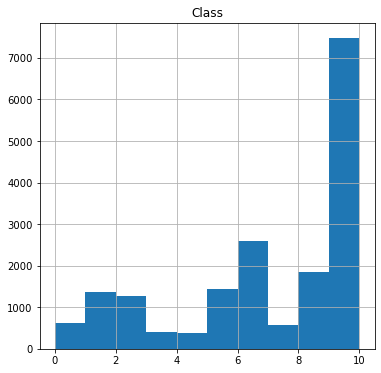

In [13]:
df[y_cols].hist(figsize=(6, 6));
plt.show();

The target variable's distribution is skewed, in other words, our dataset is imbalanced.

### Missing values

Let's see which variables has missing values and how many.

In [14]:
missing_counts = df.isna().sum()
missings = missing_counts[df.columns[missing_counts > 0]]
vars_w_missing = missings.index.values
missings

Popularity           428
instrumentalness    4377
key                 2014
dtype: int64

For numerical variables, we'll impute missing values with mean of training data. We won't impute missing values for categorical variables, but keep them as a new category.

### Categories

Let's define category values and their order if applicable. We assume `key` to be an ordered category, whereas, `mode` and `time_signature` unordered.

We'll represent missing values in categorical variables with `0`.

In [15]:
describe(df[categs])

,key,mode,time_signature
count,15982.000000,17996.000000,17996.000000
mean,5.952447,0.636753,3.924039
std,3.196854,0.480949,0.361618
min,1.000000,0.000000,1.000000
25%,3.000000,0.000000,4.000000
50%,6.000000,1.000000,4.000000
75%,9.000000,1.000000,4.000000
max,11.000000,1.000000,5.000000
n_unique,11.000000,2.000000,4.000000
n_missing,2014.000000,0.000000,0.000000


In [16]:
from pandas.api.types import CategoricalDtype

df['key'] = df['key'].fillna(0).astype(CategoricalDtype(categories=list(range(12)), ordered=True))
df['mode'] = df['mode'].astype(CategoricalDtype(categories=[0, 1], ordered=False))
df['time_signature'] = df['time_signature'].astype(CategoricalDtype(categories=[1,2,3,4,5], ordered=False))

In [17]:
describe(df[categs])

,key,mode,time_signature
count,17996.0,17996.0,17996.0
unique,12.0,2.0,4.0
top,7.0,1.0,4.0
freq,2097.0,11459.0,16451.0
n_unique,12.0,2.0,4.0
n_missing,0.0,0.0,0.0


### Train-Test Split

We'll create a stratified train-test split with 20% test set since our dataset is imbalanced.

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df[x_cols], df[y_cols], 
    test_size=0.2, 
    stratify=df[y_cols].values.ravel(), 
    random_state=42
)

### Normalization, Standardization

To prevent data leakage during folded cross validation, we'll define preprocessing pipeline including imputation, standardization/normalization and one-hot encoding.

We'll use mean imputation for missing values in numerical variables and constant imputation for categorical variables.

We'll standardize the numerical variables with symmetrical distributions and min-max normalize the ones with skewed distributions. Then, we'll one-hot encode categorical variables.


In [19]:
sym_cols = ['Popularity', 'danceability', 'valence', 'tempo']
skewed_cols = list(set(numericals).difference(sym_cols))

col2idx = {col: i for i, col in enumerate(df.columns)}
numerical_col_indices = [col2idx[col] for col in numericals]
categ_col_indices = [col2idx[col] for col in categs]
sym_col_indices = sorted([col2idx[col] for col in sym_cols])
skewed_col_indices = sorted([col2idx[col] for col in skewed_cols])

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def make_preprocessor():
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        (
            'scaler', 
             ColumnTransformer([
                ('scaler_sym', StandardScaler(), sym_col_indices),
                ('scaler_skewed', MinMaxScaler(), skewed_col_indices),
             ])
        )
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
        ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer([
        ('numerical', numeric_transformer, numerical_col_indices),
        ('categorical', categorical_transformer, categ_col_indices)
    ])
    return preprocessor

### Train & Evaluate

We'll train 

- DecisionTreeClassifier with min number of samples at leaves [3, 10]
- KNeighborsClassifier with number of neighbors [5, 10]
- LogisticRegression with inverse regularization strength `C` [1, 1.5]
 
with 5 fold cross validation. Then, we'll compare `precision`, `recall` and `accuracy` scores.
    

We'll use `GridSearchCV` from `scikit-learn` library to train our model with 5-fold cross validation and different hyper parameters.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score

def make_searcher(estimator, param_grid, cv=5, score_averaging = 'weighted', seed=42):
    return GridSearchCV(
        estimator = estimator, 
        param_grid = param_grid,
        scoring = {
            'precision': make_scorer(precision_score, average=score_averaging), 
            'recall': make_scorer(recall_score, average=score_averaging),
            'accuracy': 'accuracy'
        }, 
        refit = 'accuracy',
        cv = cv, # number of folds for cross validation
        verbose=0, 
        n_jobs = -1
    )

In [22]:
import json

def fmt_search_results(search):
    sdf = pd.DataFrame(search.cv_results_)
    cols2keep = [col for col in sdf.columns if col=='params' or col.startswith('split')]
    sdf = sdf[cols2keep]
    sdf.columns = pd.MultiIndex.from_tuples([(np.nan, col) if col=='params' else (col[:6], col[12:]) for col in sdf.columns])
    sdf = (sdf.stack(0)
       .ffill()
       .reset_index()
       .drop(columns=['level_0'])
       .dropna(how='any', axis=0)
       .rename(columns={"level_1": "split"})
      )
    
    sdf['estimator'] = search.estimator.steps[-1][-1].__class__.__name__
    return sdf[['estimator', 'params', 'split', 'accuracy', 'precision', 'recall']]

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

model_param_grids = [
    (DecisionTreeClassifier(), dict(model__min_samples_leaf = [3, 10])),
    (KNeighborsClassifier(), dict(model__n_neighbors = [5, 10])),
    (LogisticRegression(max_iter=1000), dict(model__C=[1, 1.5]))
]

sdf = pd.concat([
    fmt_search_results(
        make_searcher(Pipeline([('preprocessor', make_preprocessor()), ('model', model)]), pg)
            .fit(x_train, y_train.values.ravel())
    ) 
    for (model, pg) in model_param_grids
])

/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda

In [24]:
sdf.sort_values(by='accuracy', ascending=False)

,estimator,params,split,accuracy,precision,recall
9,LogisticRegression,{'model__C': 1.5},split2,0.486627,0.454306,0.486627
11,LogisticRegression,{'model__C': 1.5},split4,0.486280,0.454877,0.486280
10,LogisticRegression,{'model__C': 1.5},split3,0.485585,0.450075,0.485585
5,LogisticRegression,{'model__C': 1},split4,0.484196,0.452596,0.484196
7,LogisticRegression,{'model__C': 1.5},split0,0.482986,0.450070,0.482986
4,LogisticRegression,{'model__C': 1},split3,0.482112,0.448674,0.482112
3,LogisticRegression,{'model__C': 1},split2,0.482112,0.449602,0.482112
1,LogisticRegression,{'model__C': 1},split0,0.478125,0.446117,0.478125
8,LogisticRegression,{'model__C': 1.5},split1,0.476554,0.451144,0.476554
2,LogisticRegression,{'model__C': 1},split1,0.475860,0.449650,0.475860


As it can be seen from the table above, `LogisticRegression` with `C=1.5` performs best. Let's check the average of scores over splits.

In [25]:
def average_over_splits(sdf):
    return (sdf.assign(params=lambda x: x['params'].apply(str))
            .groupby(['estimator', 'params'])
            .agg(np.mean)
            .sort_values(by='accuracy', ascending=False))

In [26]:
average_over_splits(sdf)

accuracy  precision  \
estimator              params                                                 
LogisticRegression     {'model__C': 1.5}                0.483607   0.452094   
                       {'model__C': 1}                  0.480481   0.449328   
DecisionTreeClassifier {'model__min_samples_leaf': 10}  0.436719   0.427934   
                       {'model__min_samples_leaf': 3}   0.388093   0.396022   
KNeighborsClassifier   {'model__n_neighbors': 10}       0.337039   0.318947   
                       {'model__n_neighbors': 5}        0.301404   0.302634   

                                                          recall  
estimator              params                                     
LogisticRegression     {'model__C': 1.5}                0.483607  
                       {'model__C': 1}                  0.480481  
DecisionTreeClassifier {'model__min_samples_leaf': 10}  0.436719  
                       {'model__min_samples_leaf': 3}   0.388093  
KNeighborsClassifier   {'model__n_neighbors': 10}       0.337039  
                       {'model__n_neighbors': 5}        0.301404

In [27]:
m = Pipeline([('preprocessor', make_preprocessor()), ('model', LogisticRegression(C=1.5, max_iter=1000))])
m.fit(x_train.values, y_train.values.ravel());

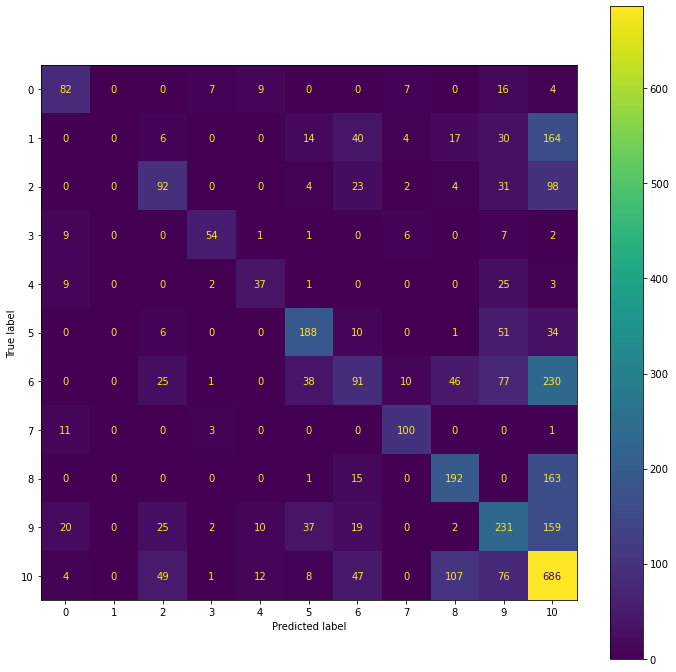

              precision    recall  f1-score   support

           0       0.61      0.66      0.63       125
           1       0.00      0.00      0.00       275
           2       0.45      0.36      0.40       254
           3       0.77      0.68      0.72        80
           4       0.54      0.48      0.51        77
           5       0.64      0.65      0.65       290
           6       0.37      0.18      0.24       518
           7       0.78      0.87      0.82       115
           8       0.52      0.52      0.52       371
           9       0.42      0.46      0.44       505
          10       0.44      0.69      0.54       990

    accuracy                           0.49      3600
   macro avg       0.50      0.50      0.50      3600
weighted avg       0.45      0.49      0.45      3600



/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = m.predict(x_test.values)
cm = confusion_matrix(y_test.values.ravel(), y_pred, labels=m.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=m.classes_)
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.show()
print(classification_report(y_test, y_pred))

<h3 style="margin-bottom:0">3) PCA</h3>

For the following use mushroom data.

    a) Apply PCA to feature columns (x1..x40) and find the principal components.
    b) Plot explained variance ratios for the principal components.
    c) Determine the most appropriate number of principal components to represent the features in a lower dimensional space while preserving as much information as possible.
    d) Apply the two best performing algorithms above on the new dataset that is created by PCA. Did your algorithm's accuracy improve? Comment.

Let's apply PCA over numerical variables.

In [29]:
def make_preprocessor_without_encoding():
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        (
            'scaler', 
             ColumnTransformer([
                ('scaler_sym', StandardScaler(), sym_col_indices),
                ('scaler_skewed', MinMaxScaler(), skewed_col_indices),
             ])
        )
    ])
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
        ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer([
        ('numerical', numeric_transformer, numerical_col_indices),
    ])
    return preprocessor

In [30]:
from sklearn.decomposition import PCA

ppca = Pipeline([
    ('preprocessor', make_preprocessor_without_encoding()), 
    ('pca', PCA()), 
])
pca = ppca.steps[1][1]
x_train_nums_pca = ppca.fit_transform(x_train[numericals].values)

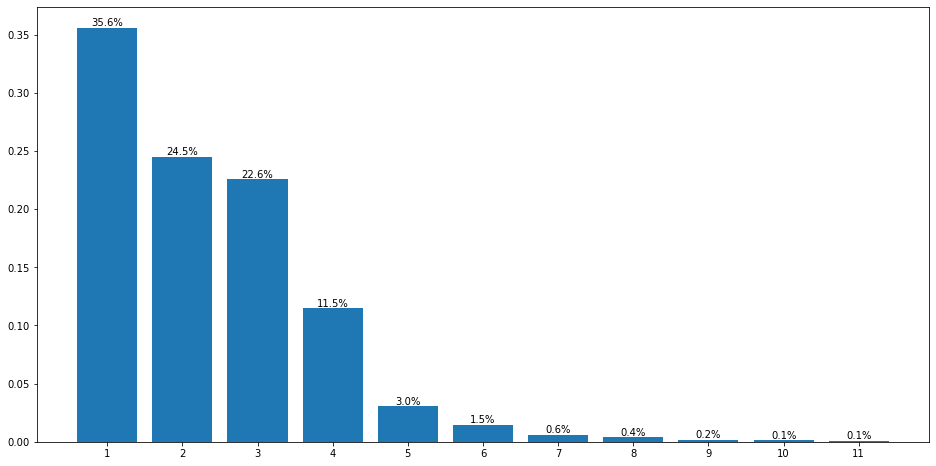

In [31]:
icomps = range(1, x_train_nums_pca.shape[-1]+1)
vrs = pca.explained_variance_ratio_

plt.figure(figsize=(16, 8))
plt.bar(icomps, vrs)
plt.xticks(icomps)
for icomp, vr in zip(icomps, vrs):
    plt.annotate(f'{vr:.1%}', xy=(icomp, vr), ha='center', va='bottom')

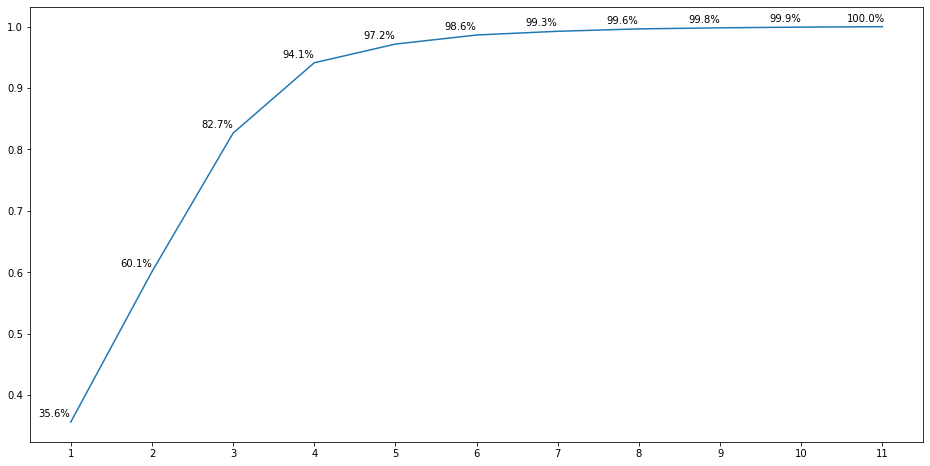

In [32]:
cvrs = np.cumsum(vrs)

plt.figure(figsize=(16, 8))
plt.plot(icomps, cvrs)
plt.xticks(icomps)
for icomp, vr in zip(icomps, cvrs):
    plt.annotate(f'{vr:.1%}', xy=(icomp-0.2, vr+0.005), ha='center', va='bottom')

5 components covers ~97.2% of variance in the training set, hence, it's a reasonable number of components for dimensionality reduction with PCA.

Let's train best two algorithms `LogisticRegression` and `DecisionTreeClassifier` with different number of PCA components.

In [33]:
def make_preprocessor_with_pca_reduction():
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
        (
            'scaler', 
             ColumnTransformer([
                ('scaler_sym', StandardScaler(), sym_col_indices),
                ('scaler_skewed', MinMaxScaler(), skewed_col_indices),
             ])
        ),
        ('pca', PCA())
    ])
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)),
        ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer([
        ('numerical', numeric_transformer, numerical_col_indices),
    ])
    return preprocessor

In [34]:
model_param_grids = [
    (DecisionTreeClassifier(), dict(model__min_samples_leaf = [10], preprocessor__numerical__pca__n_components=[3,5,7])),
    (LogisticRegression(max_iter=1000), dict(model__C=[1.5], preprocessor__numerical__pca__n_components=[3,5,7]))
]

psdf = pd.concat([
    fmt_search_results(
        make_searcher(Pipeline([('preprocessor', make_preprocessor_with_pca_reduction()), ('model', model)]), pg)
            .fit(x_train, y_train.values.ravel())
    ) 
    for (model, pg) in model_param_grids
])

/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda3/envs/di501/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/bdsaglam/miniconda

In [35]:
average_over_splits(psdf)

accuracy  \
estimator              params                                                         
LogisticRegression     {'model__C': 1.5, 'preprocessor__numerical__pca...  0.400041   
                       {'model__C': 1.5, 'preprocessor__numerical__pca...  0.382050   
DecisionTreeClassifier {'model__min_samples_leaf': 10, 'preprocessor__...  0.332522   
                       {'model__min_samples_leaf': 10, 'preprocessor__...  0.321479   
LogisticRegression     {'model__C': 1.5, 'preprocessor__numerical__pca...  0.302376   
DecisionTreeClassifier {'model__min_samples_leaf': 10, 'preprocessor__...  0.241109   

                                                                           precision  \
estimator              params                                                          
LogisticRegression     {'model__C': 1.5, 'preprocessor__numerical__pca...   0.360708   
                       {'model__C': 1.5, 'preprocessor__numerical__pca...   0.319051   
DecisionTreeClassifier {'model__min_samples_leaf': 10, 'preprocessor__...   0.322250   
                       {'model__min_samples_leaf': 10, 'preprocessor__...   0.307149   
LogisticRegression     {'model__C': 1.5, 'preprocessor__numerical__pca...   0.243043   
DecisionTreeClassifier {'model__min_samples_leaf': 10, 'preprocessor__...   0.226904   

                                                                             recall  
estimator              params                                                        
LogisticRegression     {'model__C': 1.5, 'preprocessor__numerical__pca...  0.400041  
                       {'model__C': 1.5, 'preprocessor__numerical__pca...  0.382050  
DecisionTreeClassifier {'model__min_samples_leaf': 10, 'preprocessor__...  0.332522  
                       {'model__min_samples_leaf': 10, 'preprocessor__...  0.321479  
LogisticRegression     {'model__C': 1.5, 'preprocessor__numerical__pca...  0.302376  
DecisionTreeClassifier {'model__min_samples_leaf': 10, 'preprocessor__...  0.241109

The classification scores dropped with reduced dataset for both algorithms.